In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [16]:
df = pd.read_csv('tesla.csv')

In [17]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [43]:
df['Date'].nunique()

2193

In [44]:
df['Date'].max()

Timestamp('2019-03-15 00:00:00')

In [45]:
df['Date'].min()

Timestamp('2010-06-29 00:00:00')

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\anuku\AppData\Local\Temp\ipykernel_7520\2394721818.py:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [20]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [21]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2193,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,2014-11-04 14:37:15.841313024,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,2012-08-29 00:00:00,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,2014-11-04 00:00:00,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,2017-01-09 00:00:00,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,2019-03-15 00:00:00,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07
std,NaN,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06


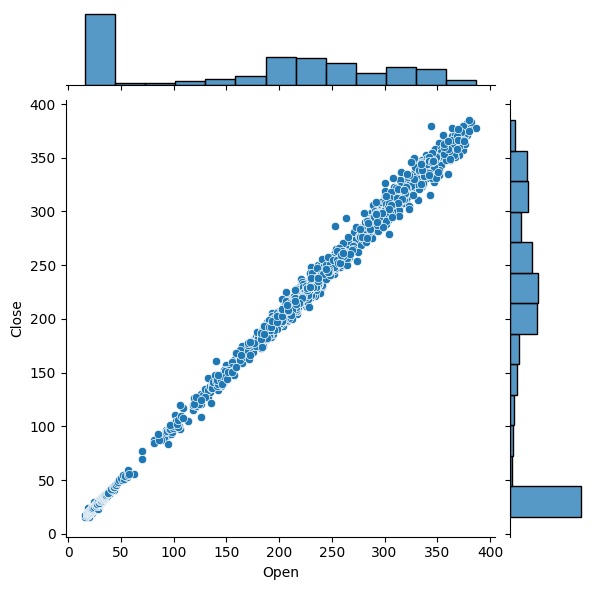

In [22]:
sns.jointplot(x='Open',y='Close',data=df)

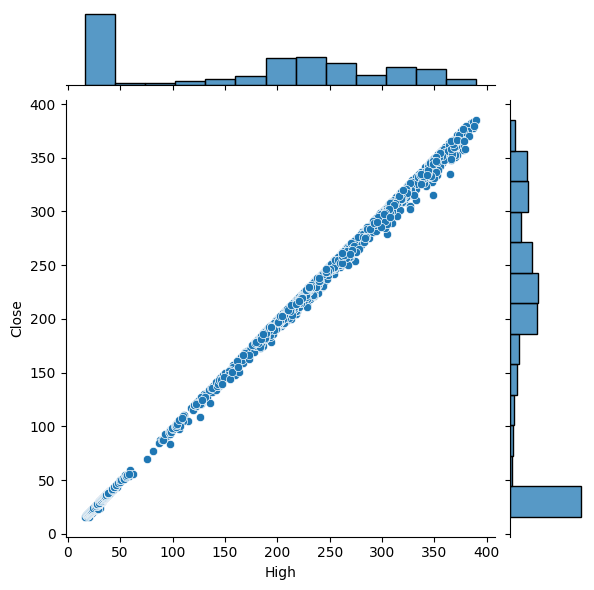

In [23]:
sns.jointplot(x='High',y='Close',data=df)

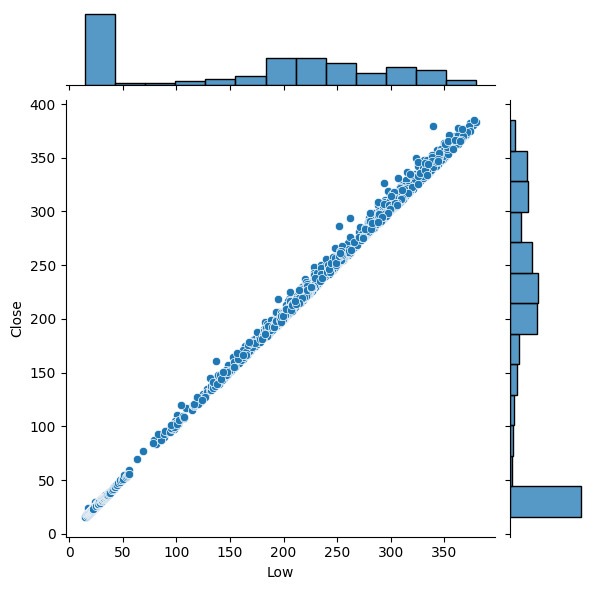

In [24]:
sns.jointplot(x='Low',y='Close',data=df)

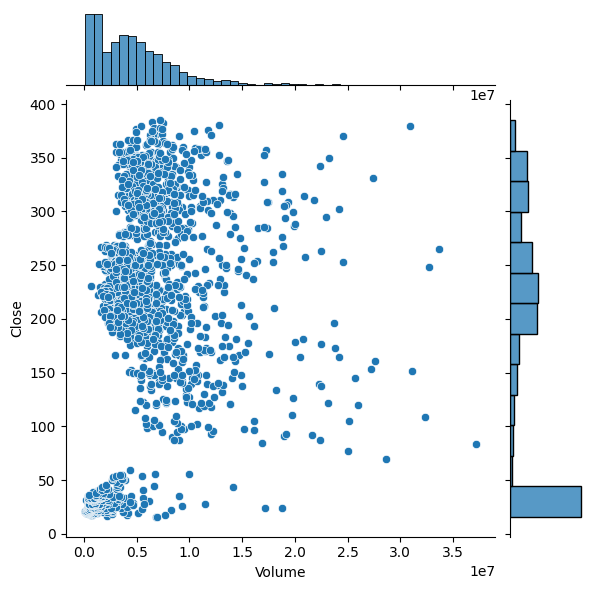

In [25]:
sns.jointplot(x='Volume',y='Close',data=df)

<AxesSubplot: xlabel='Date', ylabel='Close'>

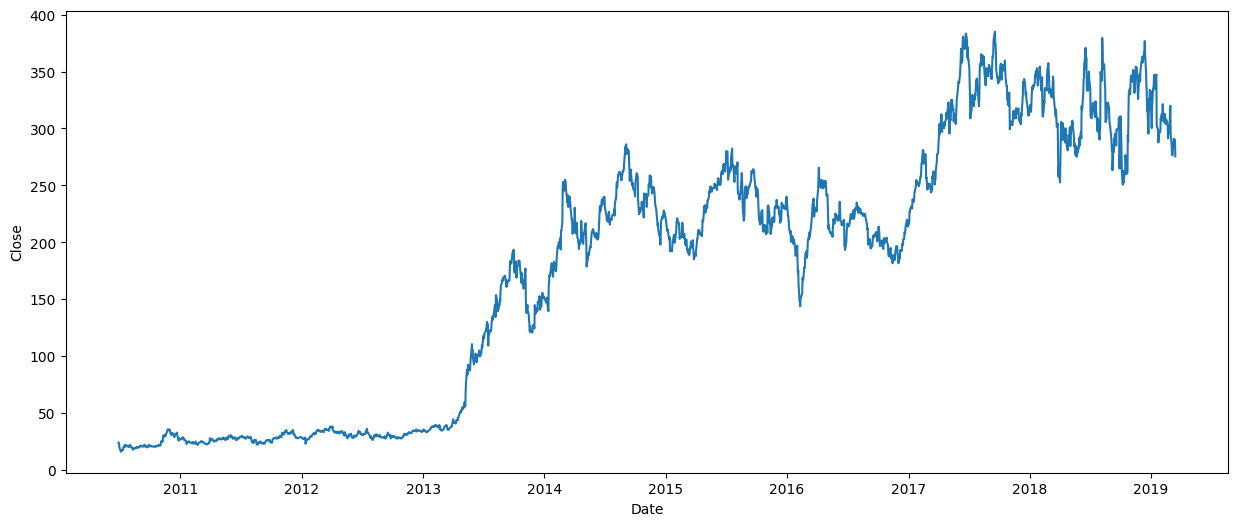

In [39]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Date',y='Close',data=df)

<AxesSubplot: xlabel='Date', ylabel='Close'>

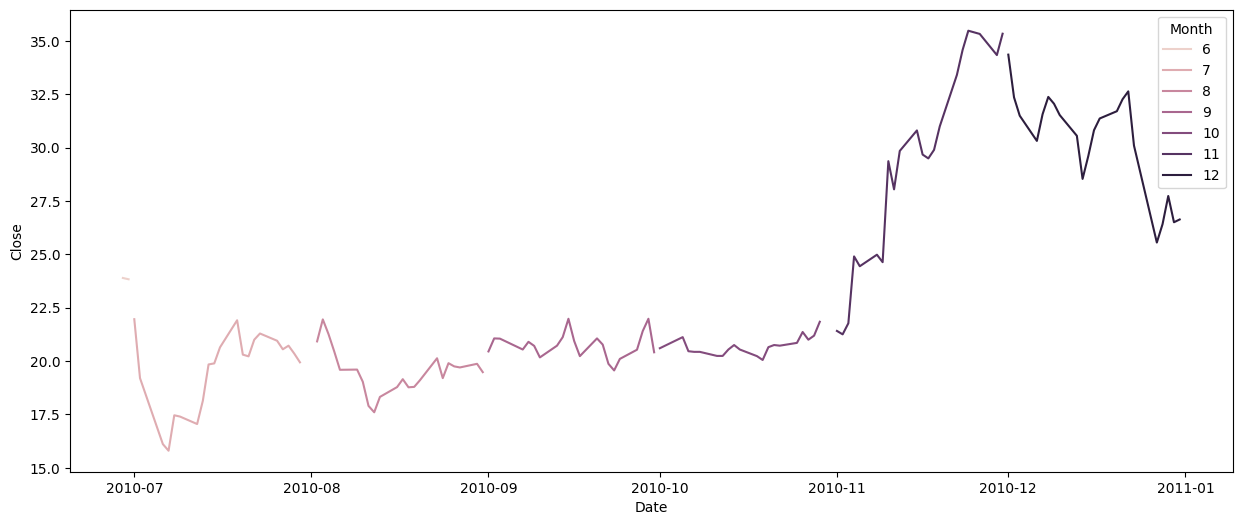

In [97]:
rt= df[df['Year'] == 2010]
rt
plt.figure(figsize=(15,6))
sns.lineplot(x='Date',y='Close',data=rt,hue='Month')

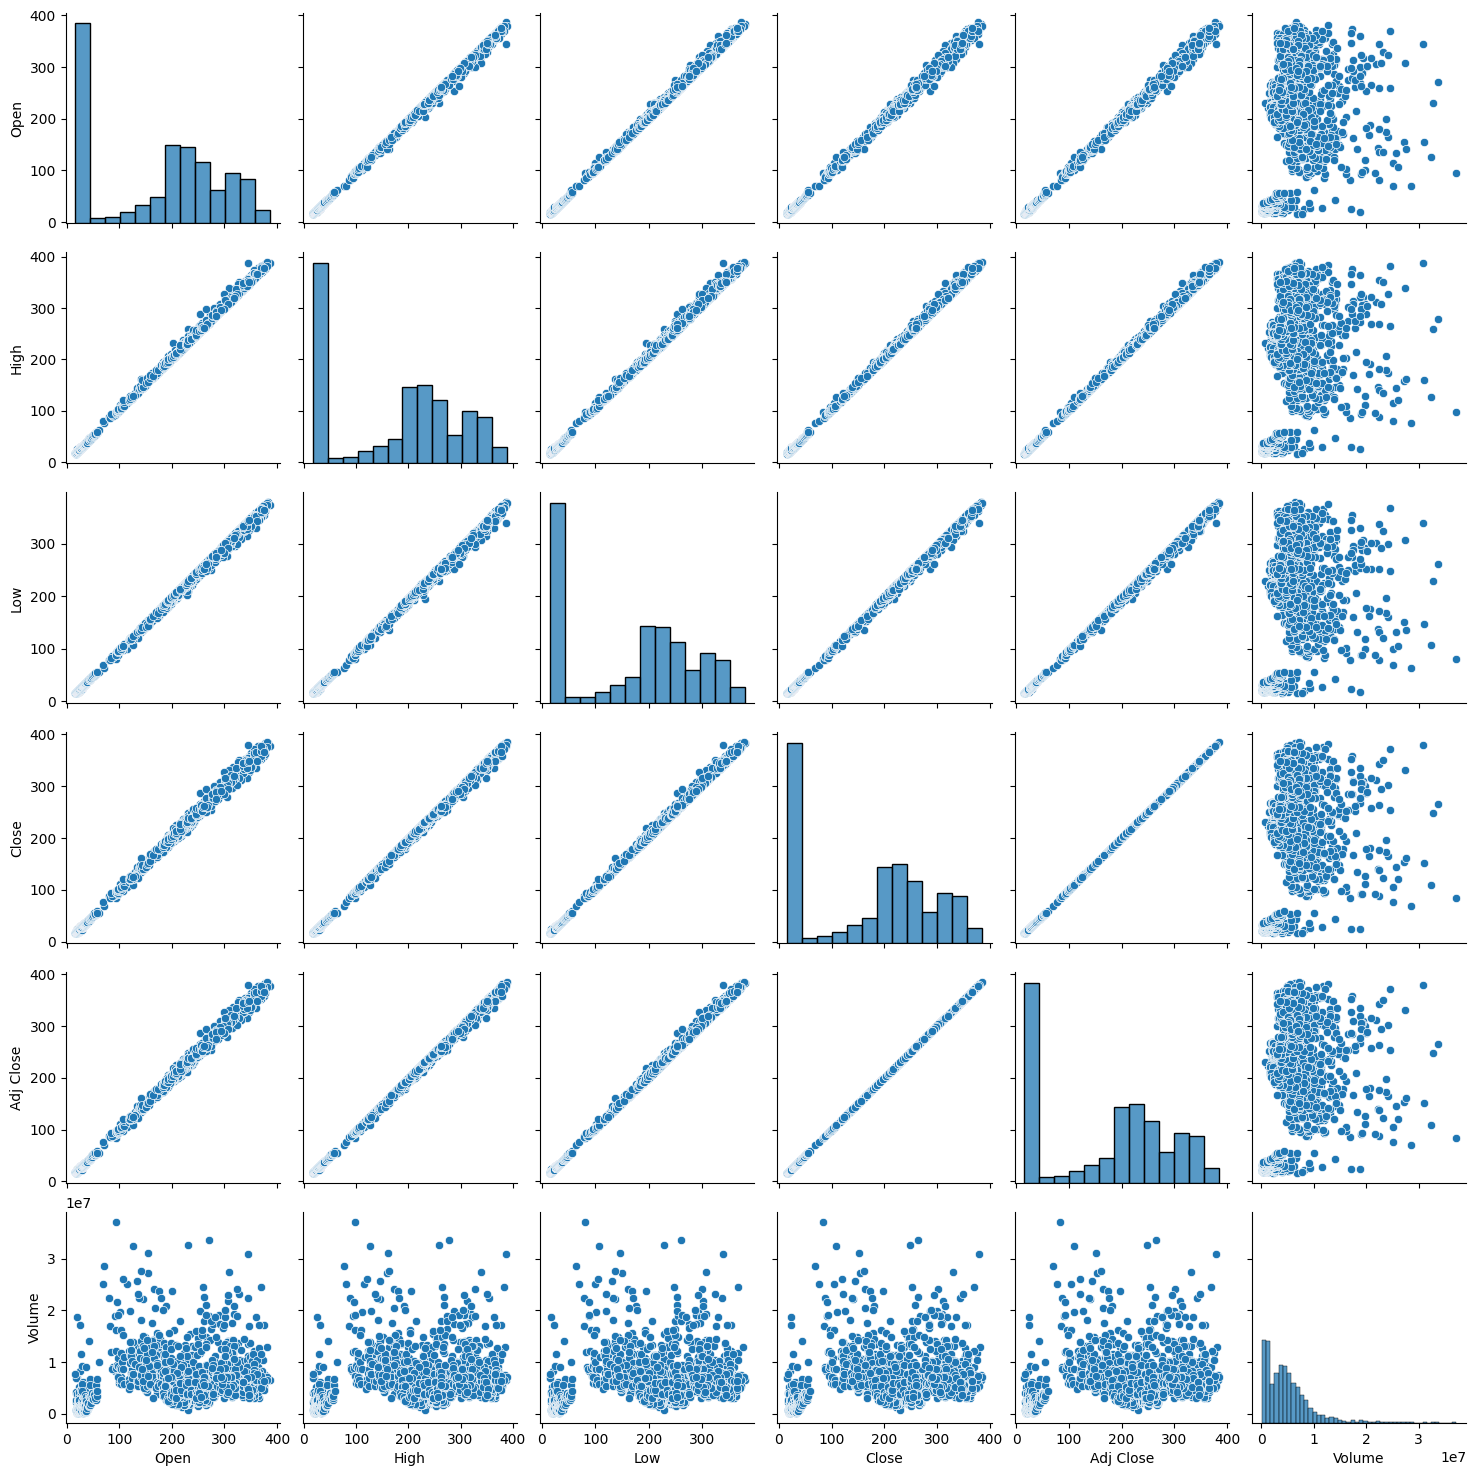

In [41]:
sns.pairplot(df)

In [46]:
df['Year'] = df['Date'].dt.year

In [48]:
df['Month'] = df['Date'].dt.month

In [49]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,2010,6
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,2010,6
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,2010,7
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,2010,7
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,2010,7


<AxesSubplot: xlabel='Date', ylabel='Close'>

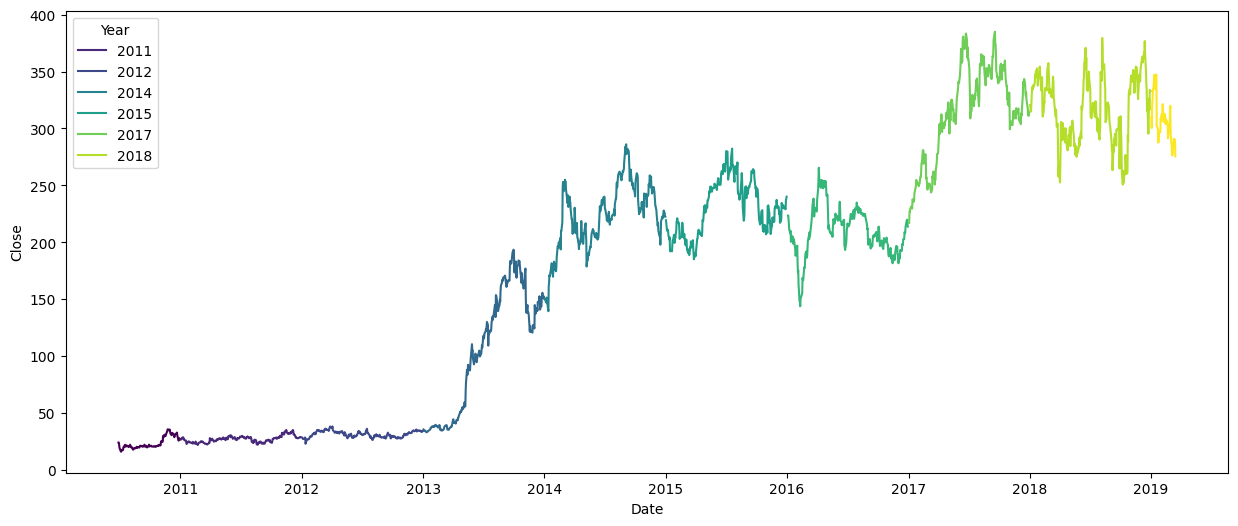

In [94]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Date',y='Close',data=df,hue='Year',palette='viridis')

<AxesSubplot: xlabel='Date', ylabel='Close'>

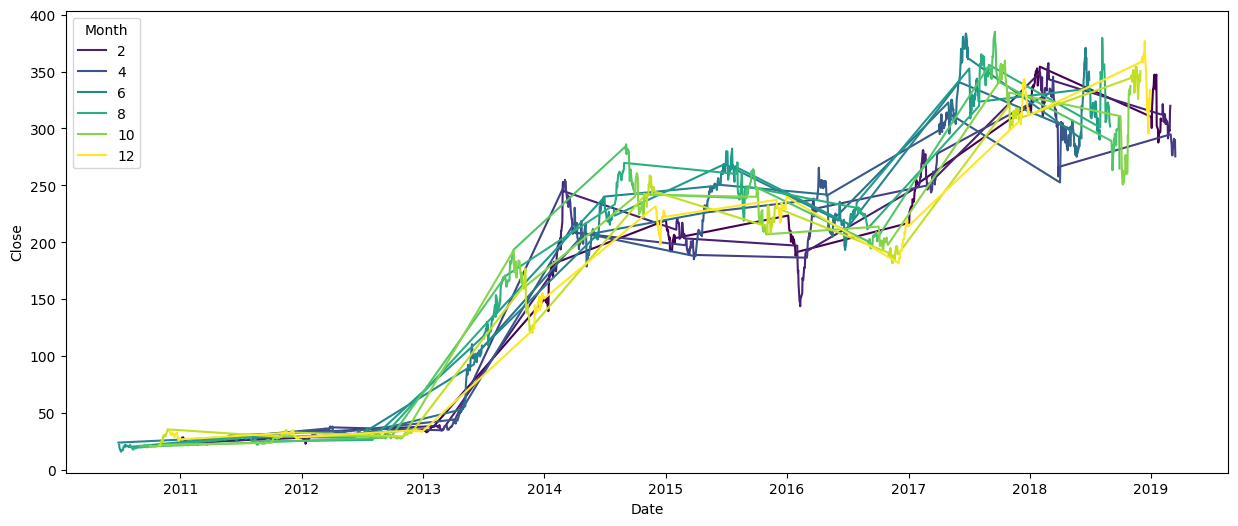

In [93]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Date',y='Close',data=df,hue='Month',palette='viridis')

<AxesSubplot: >

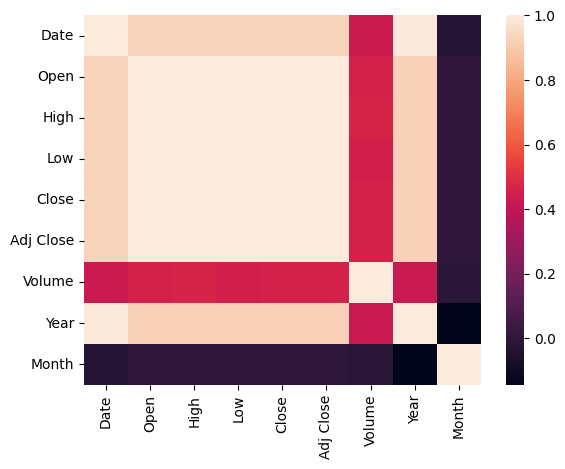

In [56]:
sns.heatmap(df.corr())

In [57]:
df.columns.tolist()

['Date',
 'Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'Year',
 'Month']

In [80]:
x= df[['Open',
 'High',
 'Low',
 'Volume']].values
y = df['Close']

In [60]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [62]:
from sklearn.linear_model import LinearRegression

In [82]:
lr = LinearRegression()

In [83]:
lr.fit(X_train,Y_train)

LinearRegression()

In [84]:
pred = lr.predict(X_test)

In [68]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [85]:
r2_score(Y_test,pred)

0.9997126592806239

In [86]:
print("MAE :",metrics.mean_absolute_error(Y_test,pred))
print("MSE :",metrics.mean_squared_error(Y_test,pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(Y_test,pred)))

MAE : 1.3281754694673025
MSE : 3.852425303290691
RMSE : 1.9627596142397803


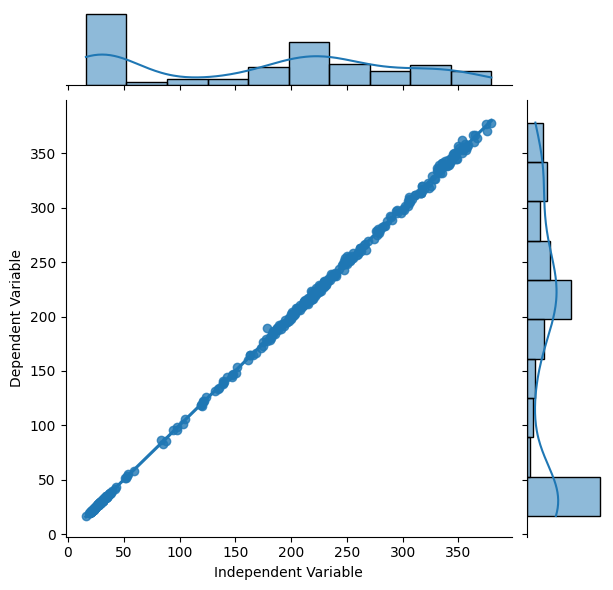

In [87]:
sns.jointplot(x=Y_test,y=pred,kind='reg')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

In [78]:
import pickle

In [79]:
pickle.dump(lr,open('model.pkl','wb'))